In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
def network(N, g):
    x = (np.random.rand(N) - 0.5) * 2 * g
    W = np.random.normal(size=(N, N), scale=g / np.sqrt(N))
    return x, W

def ode(x, t, N, W, f=np.tanh):
    dxdt = -x + np.dot(W, f(x))
    return dxdt

def simulate_network(N, g, T, dt):
    x, W = network(N, g)
    t = np.arange(0, T+dt, dt)
    solution = odeint(ode, x, t, args=(N, W))

    return solution, t

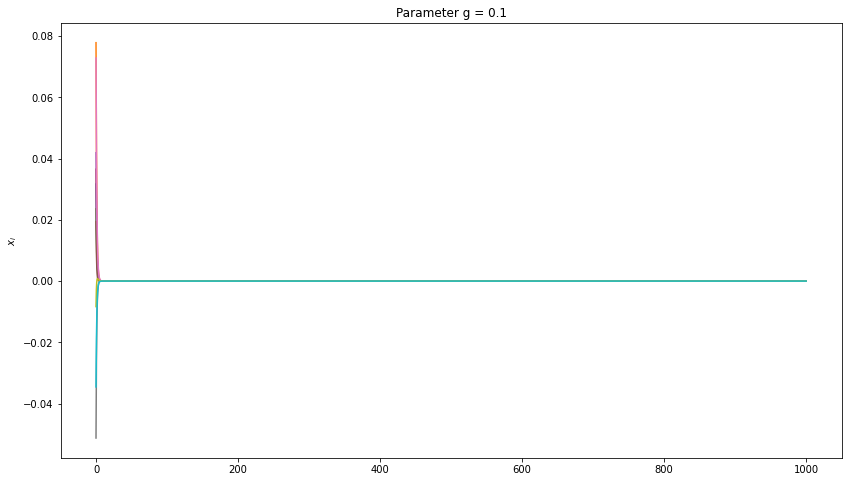

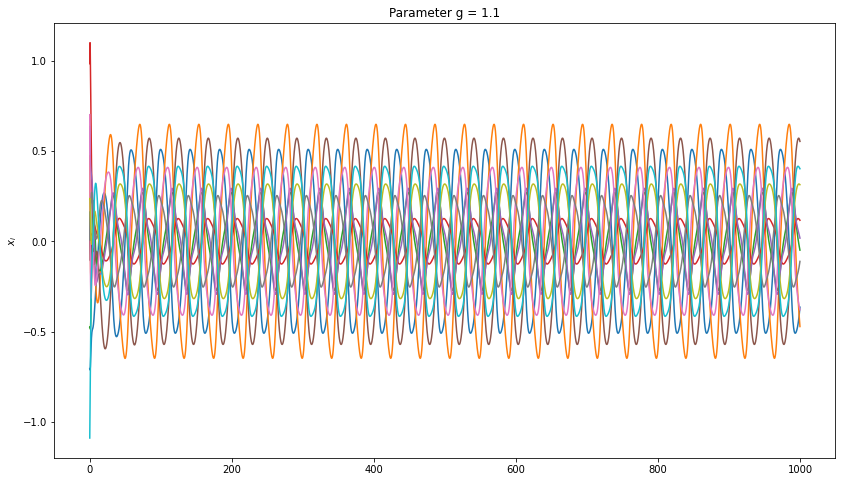

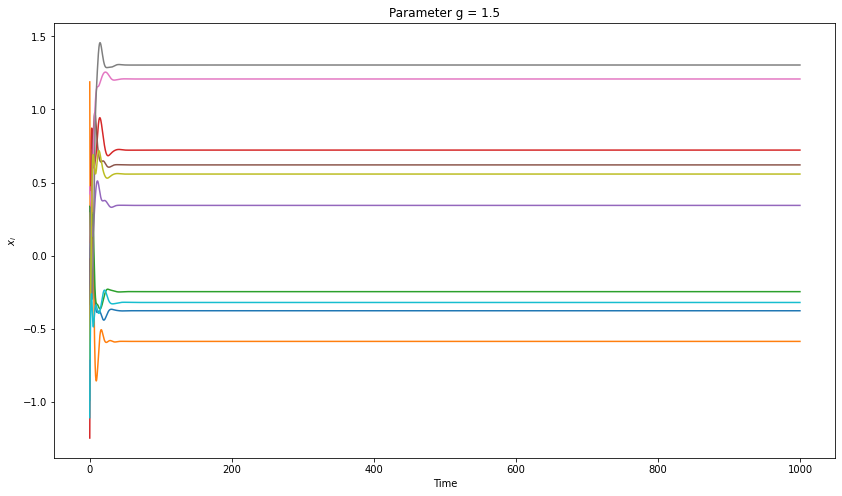

In [5]:
N = 100
gs = [0.1, 1.1, 1.5]
X = []

for g in gs:
    solution, t = simulate_network(N, g, T=1000, dt=0.01)
    X.append(solution)


plt.figure(figsize=(14, 8))
plt.plot(t, X[0][:, ::10])
plt.title("Parameter g = 0.1")
plt.ylabel(r"$x_i$")
plt.show()


plt.figure(figsize=(14, 8))
plt.plot(t, X[1][:, ::10])
plt.title("Parameter g = 1.1")
plt.ylabel(r"$x_i$")
plt.show()


plt.figure(figsize=(14, 8))
plt.plot(t, X[2][:, ::10])
plt.title("Parameter g = 1.5")
plt.ylabel(r"$x_i$")
plt.xlabel("Time")

plt.show()


For the different cases, the activation time $x_i$ either converges/reaches a steady state of zero or some other value or oscillates. These dyanmics also seem to change for each time the program is run (except in the first case for g = 0.1, where it always goes to zero). Periodic patterns seen more commonly than fixed points. 

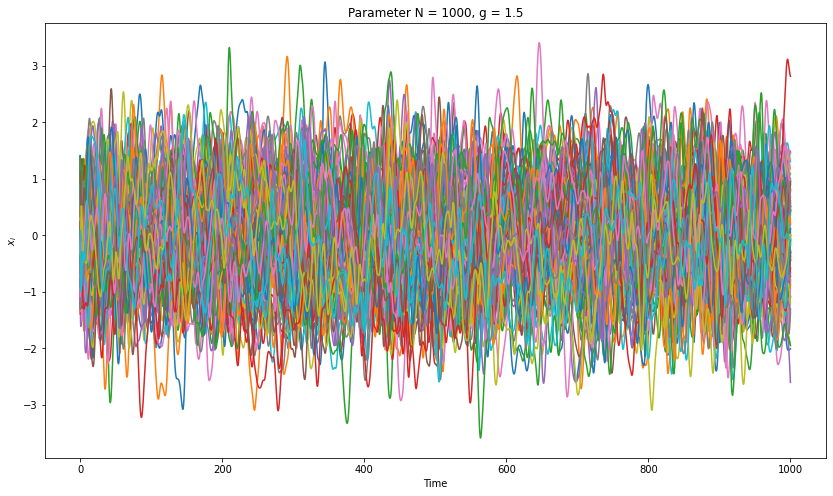

In [6]:
N = 1000
gs = [1.5]
X = []

for g in gs:
    solution, t = simulate_network(N, g, T=1000, dt=0.01)
    X.append(solution)


plt.figure(figsize=(14, 8))

plt.plot(t, X[0][:, ::10])
plt.title("Parameter N = 1000, g = 1.5")
plt.ylabel(r"$x_i$")
plt.xlabel('Time')
plt.show()

This case gives rise to unstable random oscillations, which correspond to chaotic dynamics. In the previous case there was some periodicity. 